In [103]:
import pandas as pd

import matplotlib.ticker as tick
import matplotlib.pylab as plt
import seaborn as sns
import plotly.express as px
from util.reformat_large_tick_values import reformat_large_tick_values as ticker
import plotly.graph_objects as go

from sqlalchemy.engine import create_engine
import warnings
warnings.filterwarnings('ignore', message='Cannot create BigQuery Storage client*')

In [4]:
engine = create_engine('bigquery://', credentials_path= 'key/iowa-liquor-sales-365322-12ff7a5498e6.json')

In [6]:
counties = ['Polk', 'Linn', 'Scott', 'Johnson', 'Black Hawk', 'Woodbury', 'Dubuque', 'Story', 'Dallas', 'Pottawattamie']
colors = ['#edc948', '#59a14f', '#ff9da7', '#76b7b2', '#4e79a7', '#b07aa1', '#bab0ac', '#9c755f', '#e15759', '#f28e2b']
county_colors = {county: color for county, color in zip(counties, colors)}

# Data imports

Liquor Sales Data: Iowa Liquor Sales dataset, Iowa Department of Commerce, Alcoholic Beverages Division
 `bigquery-public-data.iowa_liquor_sales`  
Data represents sales to Iowa Class "E" liquor licensees. Examples include grocery stores, liquor stores etc which sell liquor for off-premises consumption. Full dataset stored in BigQuery. Data accessed via SQL queries.

Population Data: United States Census Bureau, https://www.census.gov/quickfacts/fact/table/IA/POP010220 
Accurate population numbers are limited to 2020, the year of the US census. In this analysis, population counts and percent minors for 2020 are used for all years (2018-2023). Adult population was extrapolated using the "Persons under 18 years, percent" census data column as no counts are available for 21 years and older.

Data imports from source and dataframe creation available in [Iowa Liquor Exploratory Analysis](iowa_liquor_exploratory_analysis.ipynb)

In [8]:
liters_sold_per_adult_df = pd.read_csv('liters_sold_per_adult.csv')
liters_sold_per_adult_df

,county,liters_sold_per_adult
0,Polk,80.510252
1,Black Hawk,72.315520
2,Scott,70.322979
3,Pottawattamie,68.566631
4,Linn,68.438600
5,Johnson,62.911275
6,Woodbury,60.300233
7,Dubuque,55.686160
8,Story,51.906894
9,Dallas,48.841635


In [15]:
liters_county_month_df = pd.read_csv('liters_county_month.csv')
liters_county_month_df['month_year'] = pd.to_datetime(liters_county_month_df['month_year'])
liters_county_month_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   liters_sold_county  720 non-null    float64       
 1   month               720 non-null    int64         
 2   year                720 non-null    int64         
 3   county              720 non-null    object        
 4   month_year          720 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 28.2+ KB


In [54]:
pivot_table_df = pd.read_csv('pivot_table_month.csv')
month_df_long = pd.read_csv('month_df_long.csv')

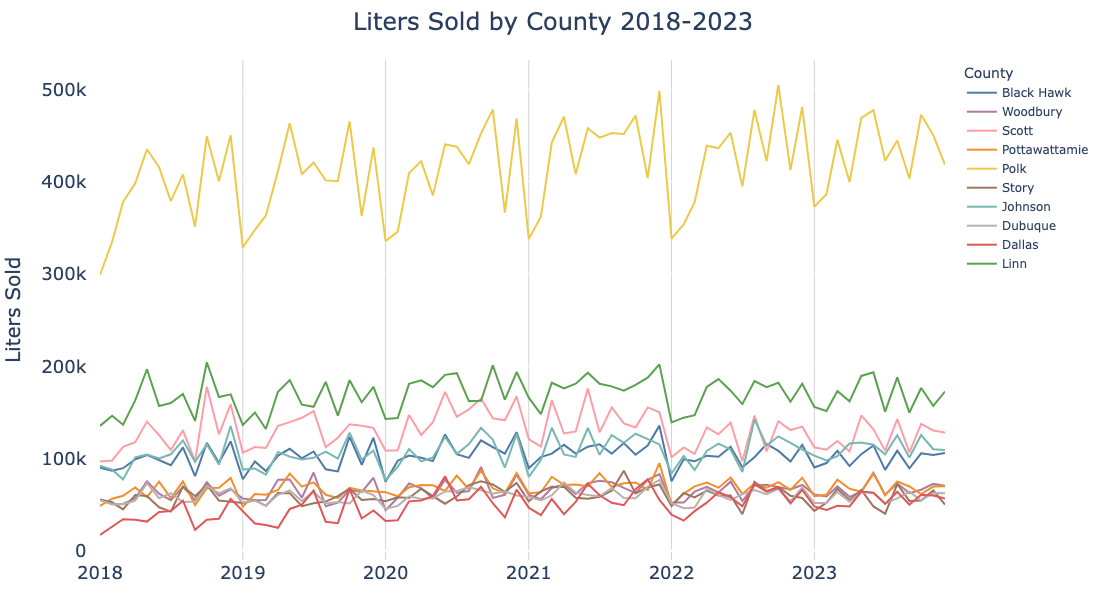

In [102]:
liters_county_month_df.sort_values(by=['month_year'], inplace=True)
fig = px.line(
    liters_county_month_df,
    x='month_year',
    y='liters_sold_county',
    orientation='h',  # Horizontal bar chart
    color='county',  # Assign colors based on 'county' field
    color_discrete_map=county_colors,  # Apply custom colors
    labels={'liters_sold': 'Liters Sold ', 'county': 'County ', 'month_year': 'Month Year ', 'liters_sold_county': 'Liters Sold '},  # Custom labels
    height=600  # Adjust height to accommodate all counties
)

# Update layout
fig.update_layout(
    xaxis=dict(
        title=None,
        tickfont=dict(size=18),
        title_font = dict(size = 20),
        showgrid = True,
        gridcolor = 'LightGrey'

    ), 
    yaxis=dict(
        title= 'Liters Sold',
        title_font = dict(size = 20),
        tickfont=dict(size=18),
        ticksuffix = '  '#
    ),
    
    title=dict(
        text = "Liters Sold by County 2018-2023",
        font = dict(size = 30),
        x = .5,
        xanchor = 'center'
     ),

    showlegend=True, 
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent background for the plot area
    margin=dict(l=40, r=40, t=60, b=40),  # Left, Right, Top, Bottom margins
    title_font_size = 24
)

fig.show()

In [56]:
month_df_long['month_year'] = pd.to_datetime(month_df_long['month_year'])
month_df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   month_year   720 non-null    datetime64[ns]
 1   county       720 non-null    object        
 2   liters_sold  720 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 17.0+ KB


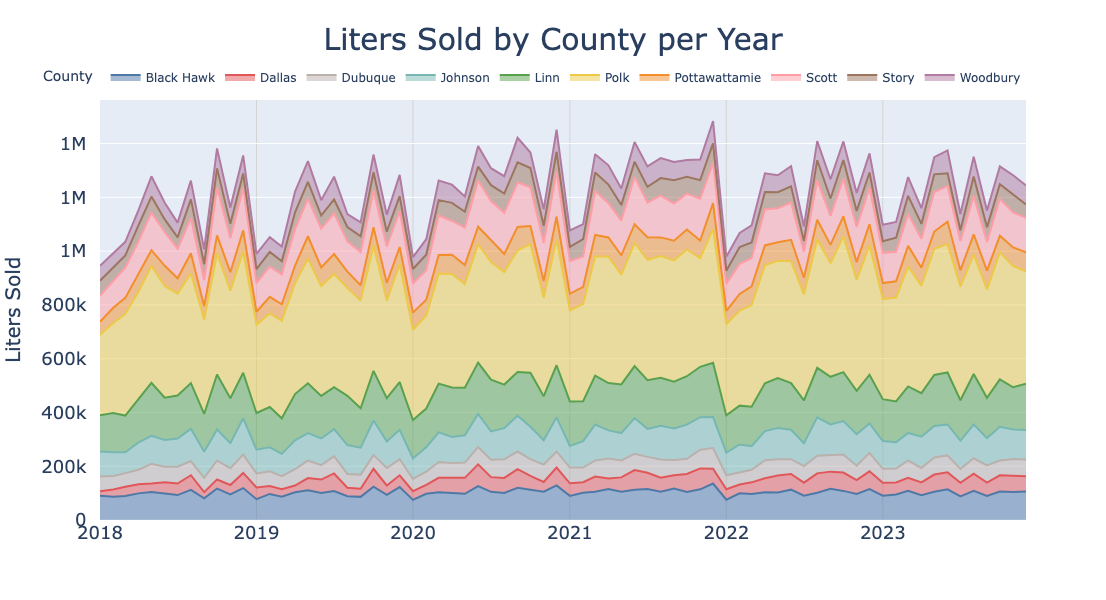

In [101]:
# Create the stacked area chart
fig = px.area(
    month_df_long,
    x='month_year', 
    y='liters_sold',
    color='county',
    color_discrete_map=county_colors,  # Custom colors
    title='Liters Sold by County',
    labels={'index': 'Month Year', 'county': 'County ', 'month_year': 'Month Year ', 'liters_sold':'Liters Sold '},
    width = 1100, 
    height = 600
)

# Update layout
fig.update_layout(

        xaxis=dict(
        title=None,
        tickfont=dict(size=18),
        showgrid = True,
        gridcolor = 'LightGrey'

    ), 
    yaxis=dict(
        title="Liters Sold",
        title_font = dict(size = 20),
        tickfont=dict(size=18),
        ticksuffix = '  ',
        tickformat=".0s"
    ),

    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
        title=dict(
        text = "Liters Sold by County per Year",  
        font = dict(size = 30),
        x = .5,
        xanchor = 'center'),
       
)
# Display the plot
fig.show()

### We see some seasonal patterns, the most notable being a jump in sales just before the new year and a drop in January. This may be due to the fact that this retail sales. Stores likely stock up for December and new year celebrations and pause ordering afterward. 

In [58]:
month_df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   month_year   720 non-null    datetime64[ns]
 1   county       720 non-null    object        
 2   liters_sold  720 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 17.0+ KB


### Let's look at the last year of sales in the top 5 counties

In [95]:
mask = (month_df_long['month_year'] >= '2023-01-01') & (month_df_long['county'].isin(['Polk', 'Linn', 'Scott', 'Johnson', 'Black Hawk']))
two_year_month_df_long = month_df_long[mask]
two_year_month_df_long.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 60 to 575
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   month_year   60 non-null     datetime64[ns]
 1   county       60 non-null     object        
 2   liters_sold  60 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.9+ KB


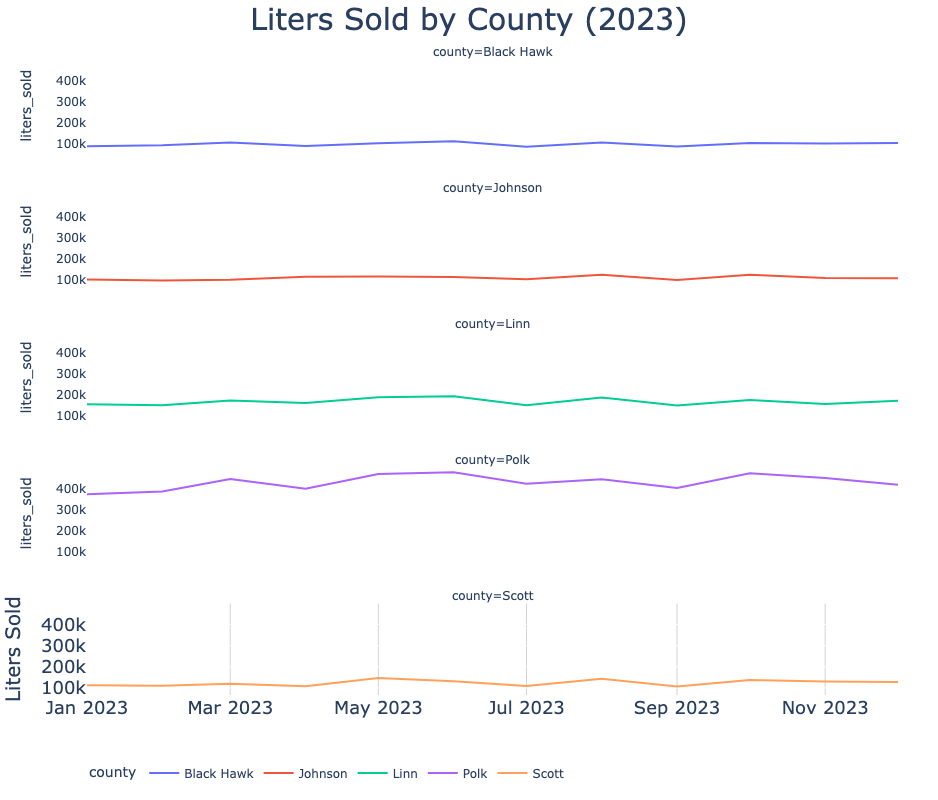

In [104]:

fig = px.line(two_year_month_df_long, 
              x='month_year', 
              y='liters_sold', 
              color='county', 
              facet_col='county', 
              facet_col_wrap=1)  

fig.update_layout(
    xaxis=dict(
        title=None,
        tickfont=dict(size=18),
        showgrid = True,
        gridcolor = 'LightGrey'

    ), 
    yaxis=dict(
        title='Liters Sold',
        tickfont=dict(size=18),
        title_font = dict(size = 20),
        #ticksuffix = '     '
    ),

    legend = dict(
        orientation = "h"
    ),
    
    title=dict(
        text = 'Liters Sold by County (2023)',
        x = .5,
        xanchor = 'center',
        font =dict(size = 30)
     ),

    
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent background for the plot area
    margin=dict(l=40, r=40, t=60, b=40),  # Left, Right, Top, Bottom margins
    width = 1100,
    height = 800
)

fig.show()

In [112]:
layout = dict(
    hoversubplots="axis",
    title="Stock Price Changes",
    hovermode="x",
    grid=dict(rows=3, columns=1),
)

data = [
    go.Scatter(x=two_year_month_df_long["month_year"], y=two_year_month_df_long["liters_sold"], xaxis="x", yaxis="y", name="Polk"),
    go.Scatter(x=two_year_month_df_long["month_year"], y=two_year_month_df_long["liters_sold"], xaxis="x", yaxis="y2", name="Linn"),
    go.Scatter(x=two_year_month_df_long["month_year"], y=two_year_month_df_long["liters_sold"], xaxis="x", yaxis="y3", name="Johnson")
]

fig = go.Figure(data=data, layout=layout)

fig.show()

ValueError: Invalid property specified for object of type plotly.graph_objs.Layout: 'hoversubplots'

Did you mean "hoverlabel"?

    Valid properties:
        activeshape
            :class:`plotly.graph_objects.layout.Activeshape`
            instance or dict with compatible properties
        annotations
            A tuple of
            :class:`plotly.graph_objects.layout.Annotation`
            instances or dicts with compatible properties
        annotationdefaults
            When used in a template (as
            layout.template.layout.annotationdefaults), sets the
            default property values to use for elements of
            layout.annotations
        autosize
            Determines whether or not a layout width or height that
            has been left undefined by the user is initialized on
            each relayout. Note that, regardless of this attribute,
            an undefined layout width or height is always
            initialized on the first call to plot.
        autotypenumbers
            Using "strict" a numeric string in trace data is not
            converted to a number. Using *convert types* a numeric
            string in trace data may be treated as a number during
            automatic axis `type` detection. This is the default
            value; however it could be overridden for individual
            axes.
        bargap
            Sets the gap (in plot fraction) between bars of
            adjacent location coordinates.
        bargroupgap
            Sets the gap (in plot fraction) between bars of the
            same location coordinate.
        barmode
            Determines how bars at the same location coordinate are
            displayed on the graph. With "stack", the bars are
            stacked on top of one another With "relative", the bars
            are stacked on top of one another, with negative values
            below the axis, positive values above With "group", the
            bars are plotted next to one another centered around
            the shared location. With "overlay", the bars are
            plotted over one another, you might need to an
            "opacity" to see multiple bars.
        barnorm
            Sets the normalization for bar traces on the graph.
            With "fraction", the value of each bar is divided by
            the sum of all values at that location coordinate.
            "percent" is the same but multiplied by 100 to show
            percentages.
        boxgap
            Sets the gap (in plot fraction) between boxes of
            adjacent location coordinates. Has no effect on traces
            that have "width" set.
        boxgroupgap
            Sets the gap (in plot fraction) between boxes of the
            same location coordinate. Has no effect on traces that
            have "width" set.
        boxmode
            Determines how boxes at the same location coordinate
            are displayed on the graph. If "group", the boxes are
            plotted next to one another centered around the shared
            location. If "overlay", the boxes are plotted over one
            another, you might need to set "opacity" to see them
            multiple boxes. Has no effect on traces that have
            "width" set.
        calendar
            Sets the default calendar system to use for
            interpreting and displaying dates throughout the plot.
        clickmode
            Determines the mode of single click interactions.
            "event" is the default value and emits the
            `plotly_click` event. In addition this mode emits the
            `plotly_selected` event in drag modes "lasso" and
            "select", but with no event data attached (kept for
            compatibility reasons). The "select" flag enables
            selecting single data points via click. This mode also
            supports persistent selections, meaning that pressing
            Shift while clicking, adds to / subtracts from an
            existing selection. "select" with `hovermode`: "x" can
            be confusing, consider explicitly setting `hovermode`:
            "closest" when using this feature. Selection events are
            sent accordingly as long as "event" flag is set as
            well. When the "event" flag is missing, `plotly_click`
            and `plotly_selected` events are not fired.
        coloraxis
            :class:`plotly.graph_objects.layout.Coloraxis` instance
            or dict with compatible properties
        colorscale
            :class:`plotly.graph_objects.layout.Colorscale`
            instance or dict with compatible properties
        colorway
            Sets the default trace colors.
        computed
            Placeholder for exporting automargin-impacting values
            namely `margin.t`, `margin.b`, `margin.l` and
            `margin.r` in "full-json" mode.
        datarevision
            If provided, a changed value tells `Plotly.react` that
            one or more data arrays has changed. This way you can
            modify arrays in-place rather than making a complete
            new copy for an incremental change. If NOT provided,
            `Plotly.react` assumes that data arrays are being
            treated as immutable, thus any data array with a
            different identity from its predecessor contains new
            data.
        dragmode
            Determines the mode of drag interactions. "select" and
            "lasso" apply only to scatter traces with markers or
            text. "orbit" and "turntable" apply only to 3D scenes.
        editrevision
            Controls persistence of user-driven changes in
            `editable: true` configuration, other than trace names
            and axis titles. Defaults to `layout.uirevision`.
        extendfunnelareacolors
            If `true`, the funnelarea slice colors (whether given
            by `funnelareacolorway` or inherited from `colorway`)
            will be extended to three times its original length by
            first repeating every color 20% lighter then each color
            20% darker. This is intended to reduce the likelihood
            of reusing the same color when you have many slices,
            but you can set `false` to disable. Colors provided in
            the trace, using `marker.colors`, are never extended.
        extendiciclecolors
            If `true`, the icicle slice colors (whether given by
            `iciclecolorway` or inherited from `colorway`) will be
            extended to three times its original length by first
            repeating every color 20% lighter then each color 20%
            darker. This is intended to reduce the likelihood of
            reusing the same color when you have many slices, but
            you can set `false` to disable. Colors provided in the
            trace, using `marker.colors`, are never extended.
        extendpiecolors
            If `true`, the pie slice colors (whether given by
            `piecolorway` or inherited from `colorway`) will be
            extended to three times its original length by first
            repeating every color 20% lighter then each color 20%
            darker. This is intended to reduce the likelihood of
            reusing the same color when you have many slices, but
            you can set `false` to disable. Colors provided in the
            trace, using `marker.colors`, are never extended.
        extendsunburstcolors
            If `true`, the sunburst slice colors (whether given by
            `sunburstcolorway` or inherited from `colorway`) will
            be extended to three times its original length by first
            repeating every color 20% lighter then each color 20%
            darker. This is intended to reduce the likelihood of
            reusing the same color when you have many slices, but
            you can set `false` to disable. Colors provided in the
            trace, using `marker.colors`, are never extended.
        extendtreemapcolors
            If `true`, the treemap slice colors (whether given by
            `treemapcolorway` or inherited from `colorway`) will be
            extended to three times its original length by first
            repeating every color 20% lighter then each color 20%
            darker. This is intended to reduce the likelihood of
            reusing the same color when you have many slices, but
            you can set `false` to disable. Colors provided in the
            trace, using `marker.colors`, are never extended.
        font
            Sets the global font. Note that fonts used in traces
            and other layout components inherit from the global
            font.
        funnelareacolorway
            Sets the default funnelarea slice colors. Defaults to
            the main `colorway` used for trace colors. If you
            specify a new list here it can still be extended with
            lighter and darker colors, see
            `extendfunnelareacolors`.
        funnelgap
            Sets the gap (in plot fraction) between bars of
            adjacent location coordinates.
        funnelgroupgap
            Sets the gap (in plot fraction) between bars of the
            same location coordinate.
        funnelmode
            Determines how bars at the same location coordinate are
            displayed on the graph. With "stack", the bars are
            stacked on top of one another With "group", the bars
            are plotted next to one another centered around the
            shared location. With "overlay", the bars are plotted
            over one another, you might need to an "opacity" to see
            multiple bars.
        geo
            :class:`plotly.graph_objects.layout.Geo` instance or
            dict with compatible properties
        grid
            :class:`plotly.graph_objects.layout.Grid` instance or
            dict with compatible properties
        height
            Sets the plot's height (in px).
        hiddenlabels
            hiddenlabels is the funnelarea & pie chart analog of
            visible:'legendonly' but it can contain many labels,
            and can simultaneously hide slices from several
            pies/funnelarea charts
        hiddenlabelssrc
            Sets the source reference on Chart Studio Cloud for
            `hiddenlabels`.
        hidesources
            Determines whether or not a text link citing the data
            source is placed at the bottom-right cored of the
            figure. Has only an effect only on graphs that have
            been generated via forked graphs from the Chart Studio
            Cloud (at https://chart-studio.plotly.com or on-
            premise).
        hoverdistance
            Sets the default distance (in pixels) to look for data
            to add hover labels (-1 means no cutoff, 0 means no
            looking for data). This is only a real distance for
            hovering on point-like objects, like scatter points.
            For area-like objects (bars, scatter fills, etc)
            hovering is on inside the area and off outside, but
            these objects will not supersede hover on point-like
            objects in case of conflict.
        hoverlabel
            :class:`plotly.graph_objects.layout.Hoverlabel`
            instance or dict with compatible properties
        hovermode
            Determines the mode of hover interactions. If
            "closest", a single hoverlabel will appear for the
            "closest" point within the `hoverdistance`. If "x" (or
            "y"), multiple hoverlabels will appear for multiple
            points at the "closest" x- (or y-) coordinate within
            the `hoverdistance`, with the caveat that no more than
            one hoverlabel will appear per trace. If *x unified*
            (or *y unified*), a single hoverlabel will appear
            multiple points at the closest x- (or y-) coordinate
            within the `hoverdistance` with the caveat that no more
            than one hoverlabel will appear per trace. In this
            mode, spikelines are enabled by default perpendicular
            to the specified axis. If false, hover interactions are
            disabled.
        iciclecolorway
            Sets the default icicle slice colors. Defaults to the
            main `colorway` used for trace colors. If you specify a
            new list here it can still be extended with lighter and
            darker colors, see `extendiciclecolors`.
        images
            A tuple of :class:`plotly.graph_objects.layout.Image`
            instances or dicts with compatible properties
        imagedefaults
            When used in a template (as
            layout.template.layout.imagedefaults), sets the default
            property values to use for elements of layout.images
        legend
            :class:`plotly.graph_objects.layout.Legend` instance or
            dict with compatible properties
        mapbox
            :class:`plotly.graph_objects.layout.Mapbox` instance or
            dict with compatible properties
        margin
            :class:`plotly.graph_objects.layout.Margin` instance or
            dict with compatible properties
        meta
            Assigns extra meta information that can be used in
            various `text` attributes. Attributes such as the
            graph, axis and colorbar `title.text`, annotation
            `text` `trace.name` in legend items, `rangeselector`,
            `updatemenus` and `sliders` `label` text all support
            `meta`. One can access `meta` fields using template
            strings: `%{meta[i]}` where `i` is the index of the
            `meta` item in question. `meta` can also be an object
            for example `{key: value}` which can be accessed
            %{meta[key]}.
        metasrc
            Sets the source reference on Chart Studio Cloud for
            `meta`.
        modebar
            :class:`plotly.graph_objects.layout.Modebar` instance
            or dict with compatible properties
        newshape
            :class:`plotly.graph_objects.layout.Newshape` instance
            or dict with compatible properties
        paper_bgcolor
            Sets the background color of the paper where the graph
            is drawn.
        piecolorway
            Sets the default pie slice colors. Defaults to the main
            `colorway` used for trace colors. If you specify a new
            list here it can still be extended with lighter and
            darker colors, see `extendpiecolors`.
        plot_bgcolor
            Sets the background color of the plotting area in-
            between x and y axes.
        polar
            :class:`plotly.graph_objects.layout.Polar` instance or
            dict with compatible properties
        scene
            :class:`plotly.graph_objects.layout.Scene` instance or
            dict with compatible properties
        selectdirection
            When `dragmode` is set to "select", this limits the
            selection of the drag to horizontal, vertical or
            diagonal. "h" only allows horizontal selection, "v"
            only vertical, "d" only diagonal and "any" sets no
            limit.
        selectionrevision
            Controls persistence of user-driven changes in selected
            points from all traces.
        separators
            Sets the decimal and thousand separators. For example,
            *. * puts a '.' before decimals and a space between
            thousands. In English locales, dflt is ".," but other
            locales may alter this default.
        shapes
            A tuple of :class:`plotly.graph_objects.layout.Shape`
            instances or dicts with compatible properties
        shapedefaults
            When used in a template (as
            layout.template.layout.shapedefaults), sets the default
            property values to use for elements of layout.shapes
        showlegend
            Determines whether or not a legend is drawn. Default is
            `true` if there is a trace to show and any of these: a)
            Two or more traces would by default be shown in the
            legend. b) One pie trace is shown in the legend. c) One
            trace is explicitly given with `showlegend: true`.
        sliders
            A tuple of :class:`plotly.graph_objects.layout.Slider`
            instances or dicts with compatible properties
        sliderdefaults
            When used in a template (as
            layout.template.layout.sliderdefaults), sets the
            default property values to use for elements of
            layout.sliders
        smith
            :class:`plotly.graph_objects.layout.Smith` instance or
            dict with compatible properties
        spikedistance
            Sets the default distance (in pixels) to look for data
            to draw spikelines to (-1 means no cutoff, 0 means no
            looking for data). As with hoverdistance, distance does
            not apply to area-like objects. In addition, some
            objects can be hovered on but will not generate
            spikelines, such as scatter fills.
        sunburstcolorway
            Sets the default sunburst slice colors. Defaults to the
            main `colorway` used for trace colors. If you specify a
            new list here it can still be extended with lighter and
            darker colors, see `extendsunburstcolors`.
        template
            Default attributes to be applied to the plot. This
            should be a dict with format: `{'layout':
            layoutTemplate, 'data': {trace_type: [traceTemplate,
            ...], ...}}` where `layoutTemplate` is a dict matching
            the structure of `figure.layout` and `traceTemplate` is
            a dict matching the structure of the trace with type
            `trace_type` (e.g. 'scatter'). Alternatively, this may
            be specified as an instance of
            plotly.graph_objs.layout.Template.  Trace templates are
            applied cyclically to traces of each type. Container
            arrays (eg `annotations`) have special handling: An
            object ending in `defaults` (eg `annotationdefaults`)
            is applied to each array item. But if an item has a
            `templateitemname` key we look in the template array
            for an item with matching `name` and apply that
            instead. If no matching `name` is found we mark the
            item invisible. Any named template item not referenced
            is appended to the end of the array, so this can be
            used to add a watermark annotation or a logo image, for
            example. To omit one of these items on the plot, make
            an item with matching `templateitemname` and `visible:
            false`.
        ternary
            :class:`plotly.graph_objects.layout.Ternary` instance
            or dict with compatible properties
        title
            :class:`plotly.graph_objects.layout.Title` instance or
            dict with compatible properties
        titlefont
            Deprecated: Please use layout.title.font instead. Sets
            the title font. Note that the title's font used to be
            customized by the now deprecated `titlefont` attribute.
        transition
            Sets transition options used during Plotly.react
            updates.
        treemapcolorway
            Sets the default treemap slice colors. Defaults to the
            main `colorway` used for trace colors. If you specify a
            new list here it can still be extended with lighter and
            darker colors, see `extendtreemapcolors`.
        uirevision
            Used to allow user interactions with the plot to
            persist after `Plotly.react` calls that are unaware of
            these interactions. If `uirevision` is omitted, or if
            it is given and it changed from the previous
            `Plotly.react` call, the exact new figure is used. If
            `uirevision` is truthy and did NOT change, any
            attribute that has been affected by user interactions
            and did not receive a different value in the new figure
            will keep the interaction value. `layout.uirevision`
            attribute serves as the default for `uirevision`
            attributes in various sub-containers. For finer control
            you can set these sub-attributes directly. For example,
            if your app separately controls the data on the x and y
            axes you might set `xaxis.uirevision=*time*` and
            `yaxis.uirevision=*cost*`. Then if only the y data is
            changed, you can update `yaxis.uirevision=*quantity*`
            and the y axis range will reset but the x axis range
            will retain any user-driven zoom.
        uniformtext
            :class:`plotly.graph_objects.layout.Uniformtext`
            instance or dict with compatible properties
        updatemenus
            A tuple of
            :class:`plotly.graph_objects.layout.Updatemenu`
            instances or dicts with compatible properties
        updatemenudefaults
            When used in a template (as
            layout.template.layout.updatemenudefaults), sets the
            default property values to use for elements of
            layout.updatemenus
        violingap
            Sets the gap (in plot fraction) between violins of
            adjacent location coordinates. Has no effect on traces
            that have "width" set.
        violingroupgap
            Sets the gap (in plot fraction) between violins of the
            same location coordinate. Has no effect on traces that
            have "width" set.
        violinmode
            Determines how violins at the same location coordinate
            are displayed on the graph. If "group", the violins are
            plotted next to one another centered around the shared
            location. If "overlay", the violins are plotted over
            one another, you might need to set "opacity" to see
            them multiple violins. Has no effect on traces that
            have "width" set.
        waterfallgap
            Sets the gap (in plot fraction) between bars of
            adjacent location coordinates.
        waterfallgroupgap
            Sets the gap (in plot fraction) between bars of the
            same location coordinate.
        waterfallmode
            Determines how bars at the same location coordinate are
            displayed on the graph. With "group", the bars are
            plotted next to one another centered around the shared
            location. With "overlay", the bars are plotted over one
            another, you might need to an "opacity" to see multiple
            bars.
        width
            Sets the plot's width (in px).
        xaxis
            :class:`plotly.graph_objects.layout.XAxis` instance or
            dict with compatible properties
        yaxis
            :class:`plotly.graph_objects.layout.YAxis` instance or
            dict with compatible properties
        
Did you mean "hoverlabel"?

Bad property path:
hoversubplots
^^^^^^^^^^^^^

In [115]:
import plotly.graph_objects as go
import pandas as pd
from plotly import data

df = data.stocks()

layout = dict(
    hoversubplots="axis",
    title="Stock Price Changes",
    hovermode="x",
    grid=dict(rows=3, columns=1),
)

data = [
    go.Scatter(x=df["date"], y=df["AAPL"], xaxis="x", yaxis="y", name="Apple"),
    go.Scatter(x=df["date"], y=df["GOOG"], xaxis="x", yaxis="y2", name="Google"),
    go.Scatter(x=df["date"], y=df["AMZN"], xaxis="x", yaxis="y3", name="Amazon"),
]

fig = go.Figure(data=data, layout=layout)

fig.show()

ValueError: Invalid property specified for object of type plotly.graph_objs.Layout: 'hoversubplots'

Did you mean "hoverlabel"?

    Valid properties:
        activeshape
            :class:`plotly.graph_objects.layout.Activeshape`
            instance or dict with compatible properties
        annotations
            A tuple of
            :class:`plotly.graph_objects.layout.Annotation`
            instances or dicts with compatible properties
        annotationdefaults
            When used in a template (as
            layout.template.layout.annotationdefaults), sets the
            default property values to use for elements of
            layout.annotations
        autosize
            Determines whether or not a layout width or height that
            has been left undefined by the user is initialized on
            each relayout. Note that, regardless of this attribute,
            an undefined layout width or height is always
            initialized on the first call to plot.
        autotypenumbers
            Using "strict" a numeric string in trace data is not
            converted to a number. Using *convert types* a numeric
            string in trace data may be treated as a number during
            automatic axis `type` detection. This is the default
            value; however it could be overridden for individual
            axes.
        bargap
            Sets the gap (in plot fraction) between bars of
            adjacent location coordinates.
        bargroupgap
            Sets the gap (in plot fraction) between bars of the
            same location coordinate.
        barmode
            Determines how bars at the same location coordinate are
            displayed on the graph. With "stack", the bars are
            stacked on top of one another With "relative", the bars
            are stacked on top of one another, with negative values
            below the axis, positive values above With "group", the
            bars are plotted next to one another centered around
            the shared location. With "overlay", the bars are
            plotted over one another, you might need to an
            "opacity" to see multiple bars.
        barnorm
            Sets the normalization for bar traces on the graph.
            With "fraction", the value of each bar is divided by
            the sum of all values at that location coordinate.
            "percent" is the same but multiplied by 100 to show
            percentages.
        boxgap
            Sets the gap (in plot fraction) between boxes of
            adjacent location coordinates. Has no effect on traces
            that have "width" set.
        boxgroupgap
            Sets the gap (in plot fraction) between boxes of the
            same location coordinate. Has no effect on traces that
            have "width" set.
        boxmode
            Determines how boxes at the same location coordinate
            are displayed on the graph. If "group", the boxes are
            plotted next to one another centered around the shared
            location. If "overlay", the boxes are plotted over one
            another, you might need to set "opacity" to see them
            multiple boxes. Has no effect on traces that have
            "width" set.
        calendar
            Sets the default calendar system to use for
            interpreting and displaying dates throughout the plot.
        clickmode
            Determines the mode of single click interactions.
            "event" is the default value and emits the
            `plotly_click` event. In addition this mode emits the
            `plotly_selected` event in drag modes "lasso" and
            "select", but with no event data attached (kept for
            compatibility reasons). The "select" flag enables
            selecting single data points via click. This mode also
            supports persistent selections, meaning that pressing
            Shift while clicking, adds to / subtracts from an
            existing selection. "select" with `hovermode`: "x" can
            be confusing, consider explicitly setting `hovermode`:
            "closest" when using this feature. Selection events are
            sent accordingly as long as "event" flag is set as
            well. When the "event" flag is missing, `plotly_click`
            and `plotly_selected` events are not fired.
        coloraxis
            :class:`plotly.graph_objects.layout.Coloraxis` instance
            or dict with compatible properties
        colorscale
            :class:`plotly.graph_objects.layout.Colorscale`
            instance or dict with compatible properties
        colorway
            Sets the default trace colors.
        computed
            Placeholder for exporting automargin-impacting values
            namely `margin.t`, `margin.b`, `margin.l` and
            `margin.r` in "full-json" mode.
        datarevision
            If provided, a changed value tells `Plotly.react` that
            one or more data arrays has changed. This way you can
            modify arrays in-place rather than making a complete
            new copy for an incremental change. If NOT provided,
            `Plotly.react` assumes that data arrays are being
            treated as immutable, thus any data array with a
            different identity from its predecessor contains new
            data.
        dragmode
            Determines the mode of drag interactions. "select" and
            "lasso" apply only to scatter traces with markers or
            text. "orbit" and "turntable" apply only to 3D scenes.
        editrevision
            Controls persistence of user-driven changes in
            `editable: true` configuration, other than trace names
            and axis titles. Defaults to `layout.uirevision`.
        extendfunnelareacolors
            If `true`, the funnelarea slice colors (whether given
            by `funnelareacolorway` or inherited from `colorway`)
            will be extended to three times its original length by
            first repeating every color 20% lighter then each color
            20% darker. This is intended to reduce the likelihood
            of reusing the same color when you have many slices,
            but you can set `false` to disable. Colors provided in
            the trace, using `marker.colors`, are never extended.
        extendiciclecolors
            If `true`, the icicle slice colors (whether given by
            `iciclecolorway` or inherited from `colorway`) will be
            extended to three times its original length by first
            repeating every color 20% lighter then each color 20%
            darker. This is intended to reduce the likelihood of
            reusing the same color when you have many slices, but
            you can set `false` to disable. Colors provided in the
            trace, using `marker.colors`, are never extended.
        extendpiecolors
            If `true`, the pie slice colors (whether given by
            `piecolorway` or inherited from `colorway`) will be
            extended to three times its original length by first
            repeating every color 20% lighter then each color 20%
            darker. This is intended to reduce the likelihood of
            reusing the same color when you have many slices, but
            you can set `false` to disable. Colors provided in the
            trace, using `marker.colors`, are never extended.
        extendsunburstcolors
            If `true`, the sunburst slice colors (whether given by
            `sunburstcolorway` or inherited from `colorway`) will
            be extended to three times its original length by first
            repeating every color 20% lighter then each color 20%
            darker. This is intended to reduce the likelihood of
            reusing the same color when you have many slices, but
            you can set `false` to disable. Colors provided in the
            trace, using `marker.colors`, are never extended.
        extendtreemapcolors
            If `true`, the treemap slice colors (whether given by
            `treemapcolorway` or inherited from `colorway`) will be
            extended to three times its original length by first
            repeating every color 20% lighter then each color 20%
            darker. This is intended to reduce the likelihood of
            reusing the same color when you have many slices, but
            you can set `false` to disable. Colors provided in the
            trace, using `marker.colors`, are never extended.
        font
            Sets the global font. Note that fonts used in traces
            and other layout components inherit from the global
            font.
        funnelareacolorway
            Sets the default funnelarea slice colors. Defaults to
            the main `colorway` used for trace colors. If you
            specify a new list here it can still be extended with
            lighter and darker colors, see
            `extendfunnelareacolors`.
        funnelgap
            Sets the gap (in plot fraction) between bars of
            adjacent location coordinates.
        funnelgroupgap
            Sets the gap (in plot fraction) between bars of the
            same location coordinate.
        funnelmode
            Determines how bars at the same location coordinate are
            displayed on the graph. With "stack", the bars are
            stacked on top of one another With "group", the bars
            are plotted next to one another centered around the
            shared location. With "overlay", the bars are plotted
            over one another, you might need to an "opacity" to see
            multiple bars.
        geo
            :class:`plotly.graph_objects.layout.Geo` instance or
            dict with compatible properties
        grid
            :class:`plotly.graph_objects.layout.Grid` instance or
            dict with compatible properties
        height
            Sets the plot's height (in px).
        hiddenlabels
            hiddenlabels is the funnelarea & pie chart analog of
            visible:'legendonly' but it can contain many labels,
            and can simultaneously hide slices from several
            pies/funnelarea charts
        hiddenlabelssrc
            Sets the source reference on Chart Studio Cloud for
            `hiddenlabels`.
        hidesources
            Determines whether or not a text link citing the data
            source is placed at the bottom-right cored of the
            figure. Has only an effect only on graphs that have
            been generated via forked graphs from the Chart Studio
            Cloud (at https://chart-studio.plotly.com or on-
            premise).
        hoverdistance
            Sets the default distance (in pixels) to look for data
            to add hover labels (-1 means no cutoff, 0 means no
            looking for data). This is only a real distance for
            hovering on point-like objects, like scatter points.
            For area-like objects (bars, scatter fills, etc)
            hovering is on inside the area and off outside, but
            these objects will not supersede hover on point-like
            objects in case of conflict.
        hoverlabel
            :class:`plotly.graph_objects.layout.Hoverlabel`
            instance or dict with compatible properties
        hovermode
            Determines the mode of hover interactions. If
            "closest", a single hoverlabel will appear for the
            "closest" point within the `hoverdistance`. If "x" (or
            "y"), multiple hoverlabels will appear for multiple
            points at the "closest" x- (or y-) coordinate within
            the `hoverdistance`, with the caveat that no more than
            one hoverlabel will appear per trace. If *x unified*
            (or *y unified*), a single hoverlabel will appear
            multiple points at the closest x- (or y-) coordinate
            within the `hoverdistance` with the caveat that no more
            than one hoverlabel will appear per trace. In this
            mode, spikelines are enabled by default perpendicular
            to the specified axis. If false, hover interactions are
            disabled.
        iciclecolorway
            Sets the default icicle slice colors. Defaults to the
            main `colorway` used for trace colors. If you specify a
            new list here it can still be extended with lighter and
            darker colors, see `extendiciclecolors`.
        images
            A tuple of :class:`plotly.graph_objects.layout.Image`
            instances or dicts with compatible properties
        imagedefaults
            When used in a template (as
            layout.template.layout.imagedefaults), sets the default
            property values to use for elements of layout.images
        legend
            :class:`plotly.graph_objects.layout.Legend` instance or
            dict with compatible properties
        mapbox
            :class:`plotly.graph_objects.layout.Mapbox` instance or
            dict with compatible properties
        margin
            :class:`plotly.graph_objects.layout.Margin` instance or
            dict with compatible properties
        meta
            Assigns extra meta information that can be used in
            various `text` attributes. Attributes such as the
            graph, axis and colorbar `title.text`, annotation
            `text` `trace.name` in legend items, `rangeselector`,
            `updatemenus` and `sliders` `label` text all support
            `meta`. One can access `meta` fields using template
            strings: `%{meta[i]}` where `i` is the index of the
            `meta` item in question. `meta` can also be an object
            for example `{key: value}` which can be accessed
            %{meta[key]}.
        metasrc
            Sets the source reference on Chart Studio Cloud for
            `meta`.
        modebar
            :class:`plotly.graph_objects.layout.Modebar` instance
            or dict with compatible properties
        newshape
            :class:`plotly.graph_objects.layout.Newshape` instance
            or dict with compatible properties
        paper_bgcolor
            Sets the background color of the paper where the graph
            is drawn.
        piecolorway
            Sets the default pie slice colors. Defaults to the main
            `colorway` used for trace colors. If you specify a new
            list here it can still be extended with lighter and
            darker colors, see `extendpiecolors`.
        plot_bgcolor
            Sets the background color of the plotting area in-
            between x and y axes.
        polar
            :class:`plotly.graph_objects.layout.Polar` instance or
            dict with compatible properties
        scene
            :class:`plotly.graph_objects.layout.Scene` instance or
            dict with compatible properties
        selectdirection
            When `dragmode` is set to "select", this limits the
            selection of the drag to horizontal, vertical or
            diagonal. "h" only allows horizontal selection, "v"
            only vertical, "d" only diagonal and "any" sets no
            limit.
        selectionrevision
            Controls persistence of user-driven changes in selected
            points from all traces.
        separators
            Sets the decimal and thousand separators. For example,
            *. * puts a '.' before decimals and a space between
            thousands. In English locales, dflt is ".," but other
            locales may alter this default.
        shapes
            A tuple of :class:`plotly.graph_objects.layout.Shape`
            instances or dicts with compatible properties
        shapedefaults
            When used in a template (as
            layout.template.layout.shapedefaults), sets the default
            property values to use for elements of layout.shapes
        showlegend
            Determines whether or not a legend is drawn. Default is
            `true` if there is a trace to show and any of these: a)
            Two or more traces would by default be shown in the
            legend. b) One pie trace is shown in the legend. c) One
            trace is explicitly given with `showlegend: true`.
        sliders
            A tuple of :class:`plotly.graph_objects.layout.Slider`
            instances or dicts with compatible properties
        sliderdefaults
            When used in a template (as
            layout.template.layout.sliderdefaults), sets the
            default property values to use for elements of
            layout.sliders
        smith
            :class:`plotly.graph_objects.layout.Smith` instance or
            dict with compatible properties
        spikedistance
            Sets the default distance (in pixels) to look for data
            to draw spikelines to (-1 means no cutoff, 0 means no
            looking for data). As with hoverdistance, distance does
            not apply to area-like objects. In addition, some
            objects can be hovered on but will not generate
            spikelines, such as scatter fills.
        sunburstcolorway
            Sets the default sunburst slice colors. Defaults to the
            main `colorway` used for trace colors. If you specify a
            new list here it can still be extended with lighter and
            darker colors, see `extendsunburstcolors`.
        template
            Default attributes to be applied to the plot. This
            should be a dict with format: `{'layout':
            layoutTemplate, 'data': {trace_type: [traceTemplate,
            ...], ...}}` where `layoutTemplate` is a dict matching
            the structure of `figure.layout` and `traceTemplate` is
            a dict matching the structure of the trace with type
            `trace_type` (e.g. 'scatter'). Alternatively, this may
            be specified as an instance of
            plotly.graph_objs.layout.Template.  Trace templates are
            applied cyclically to traces of each type. Container
            arrays (eg `annotations`) have special handling: An
            object ending in `defaults` (eg `annotationdefaults`)
            is applied to each array item. But if an item has a
            `templateitemname` key we look in the template array
            for an item with matching `name` and apply that
            instead. If no matching `name` is found we mark the
            item invisible. Any named template item not referenced
            is appended to the end of the array, so this can be
            used to add a watermark annotation or a logo image, for
            example. To omit one of these items on the plot, make
            an item with matching `templateitemname` and `visible:
            false`.
        ternary
            :class:`plotly.graph_objects.layout.Ternary` instance
            or dict with compatible properties
        title
            :class:`plotly.graph_objects.layout.Title` instance or
            dict with compatible properties
        titlefont
            Deprecated: Please use layout.title.font instead. Sets
            the title font. Note that the title's font used to be
            customized by the now deprecated `titlefont` attribute.
        transition
            Sets transition options used during Plotly.react
            updates.
        treemapcolorway
            Sets the default treemap slice colors. Defaults to the
            main `colorway` used for trace colors. If you specify a
            new list here it can still be extended with lighter and
            darker colors, see `extendtreemapcolors`.
        uirevision
            Used to allow user interactions with the plot to
            persist after `Plotly.react` calls that are unaware of
            these interactions. If `uirevision` is omitted, or if
            it is given and it changed from the previous
            `Plotly.react` call, the exact new figure is used. If
            `uirevision` is truthy and did NOT change, any
            attribute that has been affected by user interactions
            and did not receive a different value in the new figure
            will keep the interaction value. `layout.uirevision`
            attribute serves as the default for `uirevision`
            attributes in various sub-containers. For finer control
            you can set these sub-attributes directly. For example,
            if your app separately controls the data on the x and y
            axes you might set `xaxis.uirevision=*time*` and
            `yaxis.uirevision=*cost*`. Then if only the y data is
            changed, you can update `yaxis.uirevision=*quantity*`
            and the y axis range will reset but the x axis range
            will retain any user-driven zoom.
        uniformtext
            :class:`plotly.graph_objects.layout.Uniformtext`
            instance or dict with compatible properties
        updatemenus
            A tuple of
            :class:`plotly.graph_objects.layout.Updatemenu`
            instances or dicts with compatible properties
        updatemenudefaults
            When used in a template (as
            layout.template.layout.updatemenudefaults), sets the
            default property values to use for elements of
            layout.updatemenus
        violingap
            Sets the gap (in plot fraction) between violins of
            adjacent location coordinates. Has no effect on traces
            that have "width" set.
        violingroupgap
            Sets the gap (in plot fraction) between violins of the
            same location coordinate. Has no effect on traces that
            have "width" set.
        violinmode
            Determines how violins at the same location coordinate
            are displayed on the graph. If "group", the violins are
            plotted next to one another centered around the shared
            location. If "overlay", the violins are plotted over
            one another, you might need to set "opacity" to see
            them multiple violins. Has no effect on traces that
            have "width" set.
        waterfallgap
            Sets the gap (in plot fraction) between bars of
            adjacent location coordinates.
        waterfallgroupgap
            Sets the gap (in plot fraction) between bars of the
            same location coordinate.
        waterfallmode
            Determines how bars at the same location coordinate are
            displayed on the graph. With "group", the bars are
            plotted next to one another centered around the shared
            location. With "overlay", the bars are plotted over one
            another, you might need to an "opacity" to see multiple
            bars.
        width
            Sets the plot's width (in px).
        xaxis
            :class:`plotly.graph_objects.layout.XAxis` instance or
            dict with compatible properties
        yaxis
            :class:`plotly.graph_objects.layout.YAxis` instance or
            dict with compatible properties
        
Did you mean "hoverlabel"?

Bad property path:
hoversubplots
^^^^^^^^^^^^^

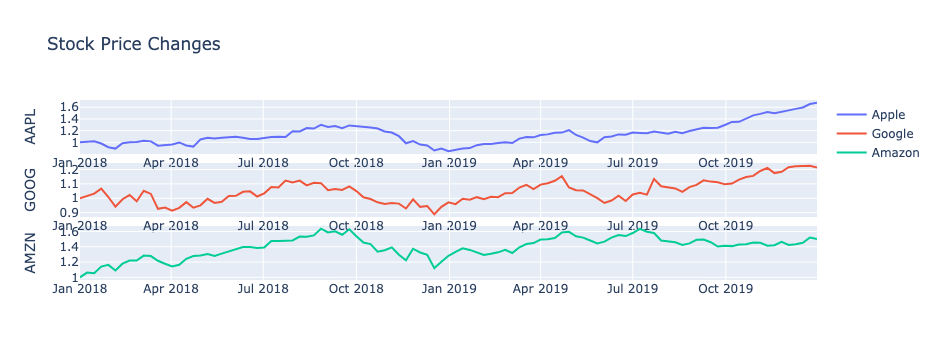

In [116]:
import plotly.graph_objects as go
import pandas as pd
from plotly.data import stocks

df = stocks()

# Define layout with subplot axes properly configured
layout = dict(
    title="Stock Price Changes",
    hovermode="x unified",
    xaxis=dict(domain=[0, 1]),  # full width
    xaxis2=dict(domain=[0, 1], anchor='y2'),  # full width, anchored to the second y-axis
    xaxis3=dict(domain=[0, 1], anchor='y3'),  # full width, anchored to the third y-axis
    yaxis=dict(domain=[0.7, 1], title="AAPL"),  # top axis
    yaxis2=dict(domain=[0.35, 0.65], title="GOOG"),  # middle axis
    yaxis3=dict(domain=[0, 0.3], title="AMZN"),  # bottom axis
    grid=dict(rows=3, columns=1, pattern='independent'),  # Ensures independent scaling
)

# Define the data for each subplot
data = [
    go.Scatter(x=df["date"], y=df["AAPL"], xaxis="x", yaxis="y", name="Apple"),
    go.Scatter(x=df["date"], y=df["GOOG"], xaxis="x2", yaxis="y2", name="Google"),
    go.Scatter(x=df["date"], y=df["AMZN"], xaxis="x3", yaxis="y3", name="Amazon"),
]

fig = go.Figure(data=data, layout=layout)
fig.show()

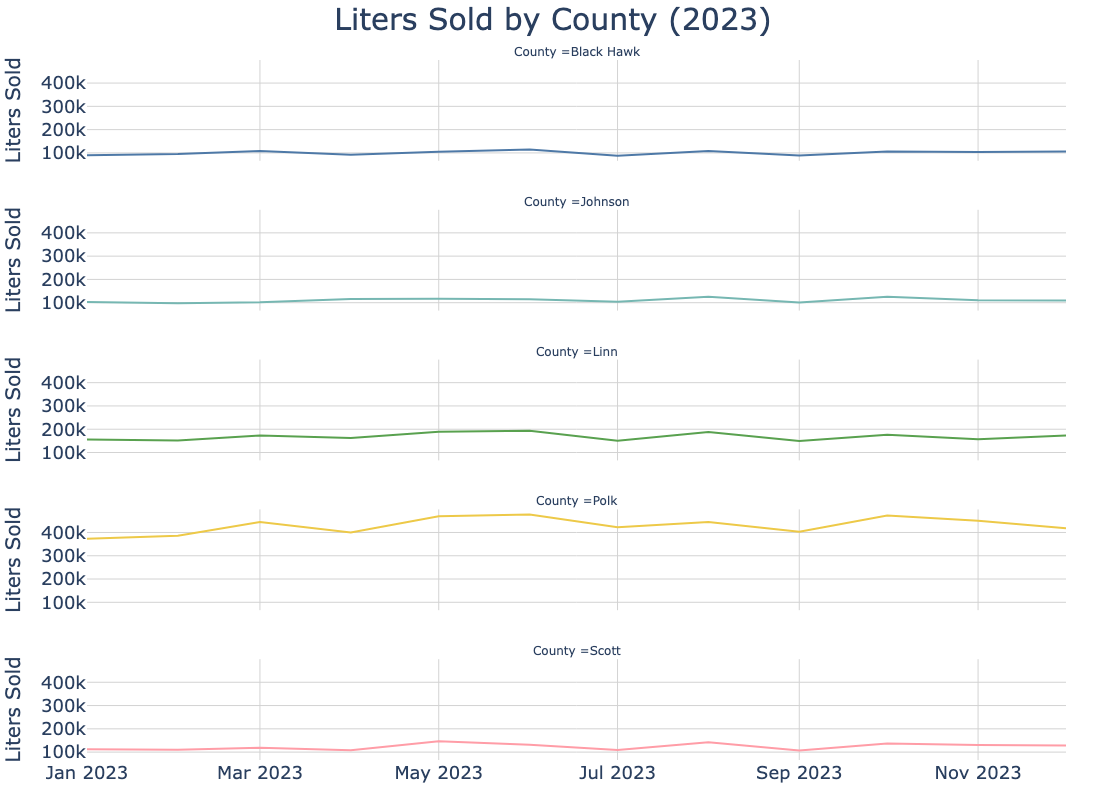

In [127]:
fig = px.line(
    two_year_month_df_long, 
    x='month_year', 
    y='liters_sold', 
    facet_col='county',  # Creates a separate plot for each county
    facet_col_wrap=1,  # Each subplot in a new row
    color='county',
    color_discrete_map=county_colors,  # Custom colors
    title='Liters Sold by County',
    labels={'index': 'Month Year', 'county': 'County ', 'month_year': 'Month Year ', 'liters_sold':'Liters Sold '}

)
# Update x-axes for all subplots (if necessary)
fig.update_xaxes(
    title=None,
    tickfont=dict(size=18),
    showgrid=True,
    gridcolor='LightGrey'
),

# Update y-axes for all subplots
fig.update_yaxes(
    title='Liters Sold',
    tickfont=dict(size=18),
    title_font=dict(size=20),
    showgrid=True,
    gridcolor='LightGrey',
    matches='y'
),

fig.update_layout(


 
    title=dict(
        text='Liters Sold by County (2023)',
        x=0.5,  # Center the title
        xanchor='center',
        font=dict(size=30)  # Large font size for title
    ),
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent background for the plot area
    margin=dict(l=40, r=40, t=60, b=40),  # Adjust margins
    width=1100,
    height=800, 
    showlegend = False
)

fig.show()

In [161]:
cat_sql_statement = """
with source_table AS(
  SELECT
  volume_sold_liters,
  county,
  item_description,
  category_name
  FROM `bigquery-public-data.iowa_liquor_sales.sales`
  WHERE EXTRACT(YEAR FROM date) = 2023 AND county IN ("POLK")
  #,"LINN","SCOTT","JOHNSON","BLACK HAWK","WOODBURY","DUBUQUE","STORY","DALLAS","POTTAWATTA")
),

liquor_categories AS 
  (SELECT
  volume_sold_liters,
  county,
  CASE 
  WHEN category_name LIKE '%AMAR%' OR category_name LIKE '%CREME%'OR category_name LIKE '%LIQUEUR%' OR category_name LIKE '%CORDIAL%' OR category_name LIKE '%ANIS%' OR category_name LIKE '%TRIPLE SEC%' OR item_description LIKE '%JAGERM%' OR item_description LIKE '%LIQUEUR%' OR item_description LIKE '%SAINTS N SINNERS APPLE PIE%' THEN 'Liqueur' 
  WHEN category_name LIKE '%WHIS%' OR category_name LIKE '%BOUR%'OR category_name LIKE '%RYE%' OR item_description LIKE '%RYE%' OR item_description LIKE '%WHIS%'OR item_description LIKE '%SCOTCH%' OR category_name LIKE '%SCOTCH%' OR item_description LIKE '%BEAM%' OR item_description LIKE '%BOUR%' OR item_description LIKE '%CROWN ROYAL%' OR item_description LIKE '%JACK DAN%'OR item_description LIKE '%EVAN WILL%'OR item_description LIKE '%MAKER%MARK%' OR item_description LIKE '%SIR WINSTON%' OR item_description LIKE '%ELIJAH%' OR item_description LIKE '%JOHNNIE WALKER%'THEN 'Whiskey'
  WHEN category_name LIKE '%VOD%' OR item_description LIKE '%VOD%'OR item_description LIKE '%SMIRN%'THEN 'Vodka'
  WHEN category_name LIKE '%BRANDI%' OR category_name LIKE '%BRANDY%' OR category_name LIKE '%SCHNAPPS%' OR item_description LIKE '%COGNAC%' OR item_description LIKE '%HENNESSY%'THEN 'Brandy'
  WHEN category_name LIKE '%RUM%' OR item_description LIKE '%RUM%' OR item_description LIKE '%CAPTAIN MOR%'THEN 'Rum'
  WHEN category_name LIKE '%TEQ%' OR category_name LIKE '%MEZC%' OR item_description LIKE '%JUAREZ%' OR item_description LIKE '%TEQU%' OR item_description LIKE '%REPOSADO%' OR item_description LIKE '%TORTILLA GOLD%' OR item_description LIKE '%MONTEZUMA%' THEN 'Tequila and Mezcal'
  WHEN category_name LIKE '%GIN%' OR item_description LIKE '%GIN%' THEN 'Gin'

  WHEN category_name LIKE '%COCKT%' OR item_description LIKE '%TARANTULA%' THEN 'Cocktails'
  ELSE 'Other' END AS liquor_type
  FROM source_table)

SELECT  
  liquor_type,
  county,
  sum(volume_sold_liters) AS liters_sold_per_cat
FROM liquor_categories
WHERE county = "POLK"
GROUP BY liquor_type, county
ORDER BY liters_sold_per_cat
""" .strip()

In [163]:
cat_sales_df = pd.read_sql_query(cat_sql_statement, engine)
cat_sales_df['county'] = cat_sales_df['county'].str.title()
cat_sales_df.head()

,liquor_type,county,liters_sold_per_cat
0,Other,Polk,45233.47
1,Gin,Polk,137903.58
2,Cocktails,Polk,179965.59
3,Brandy,Polk,272123.65
4,Rum,Polk,483269.61


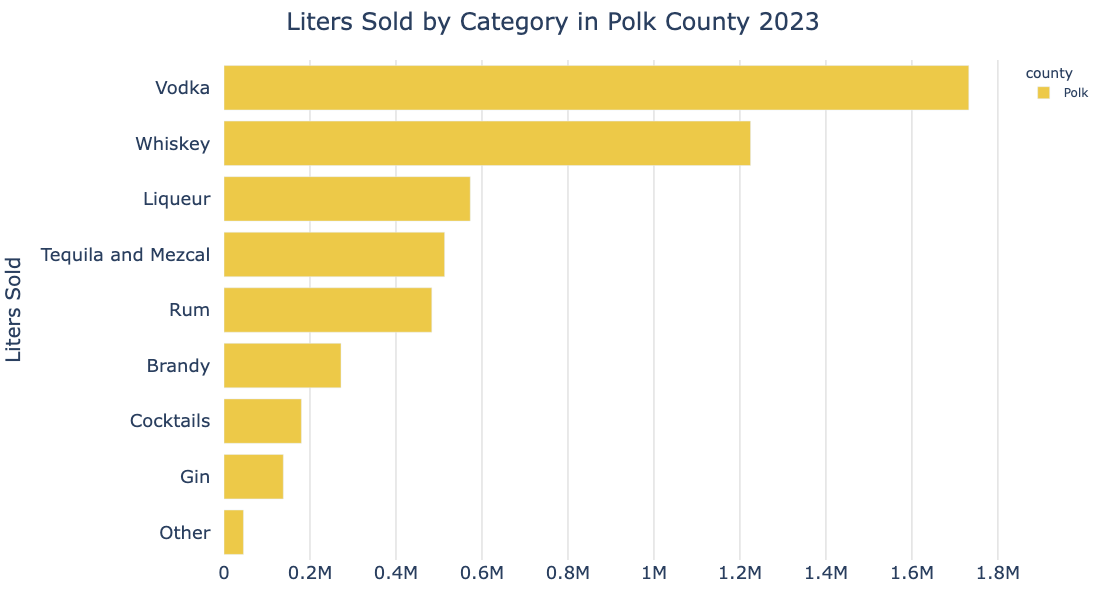

In [164]:
fig = px.bar(
    cat_sales_df,
    x='liters_sold_per_cat',
    y='liquor_type',
    orientation='h',  # Horizontal bar chart
    color='county',  # Assign colors based on 'county' field
    color_discrete_map=county_colors,  # Apply custom colors
    #labels={'liters_sold': 'Liters Sold ', 'county': 'County ', 'year': 'Year '},  # Custom labels
    height=600  
)

# Update layout
fig.update_layout(
    xaxis=dict(
        title=None,
        tickfont=dict(size=18),
        showgrid = True,
        gridcolor = 'LightGrey'

    ), 
    yaxis=dict(
        title='Liters Sold',
        tickfont=dict(size=18),
        title_font = dict(size = 20),
        ticksuffix = '  '#
    ),
    
    title=dict(
        text = "Liters Sold by Category in Polk County 2023",
        x = .5,
        xanchor = 'center'
     ),

    showlegend=True,  # Hide legend since colors are used for encoding 'county'
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent background for the plot area
    margin=dict(l=40, r=40, t=60, b=40),  # Left, Right, Top, Bottom margins
    title_font_size = 24
)

fig.show()